# OSM Visualization with NetworkX

This notebook demonstrates the usage of the [NetworkX](https://networkx.org) package for processing and visualziation of OpenStreetMap data as a graph.

In [31]:
import pandas as pd
import networkx as nx
import matplotlib.pyplot as plt
%matplotlib inline

## Preliminaries

We will read in two CSV files corresponding to [this](https://export.hotosm.org/en/v3/exports/749d3d19-db3d-4a42-94e9-bda30b36667d) export of Catanduanes Island.

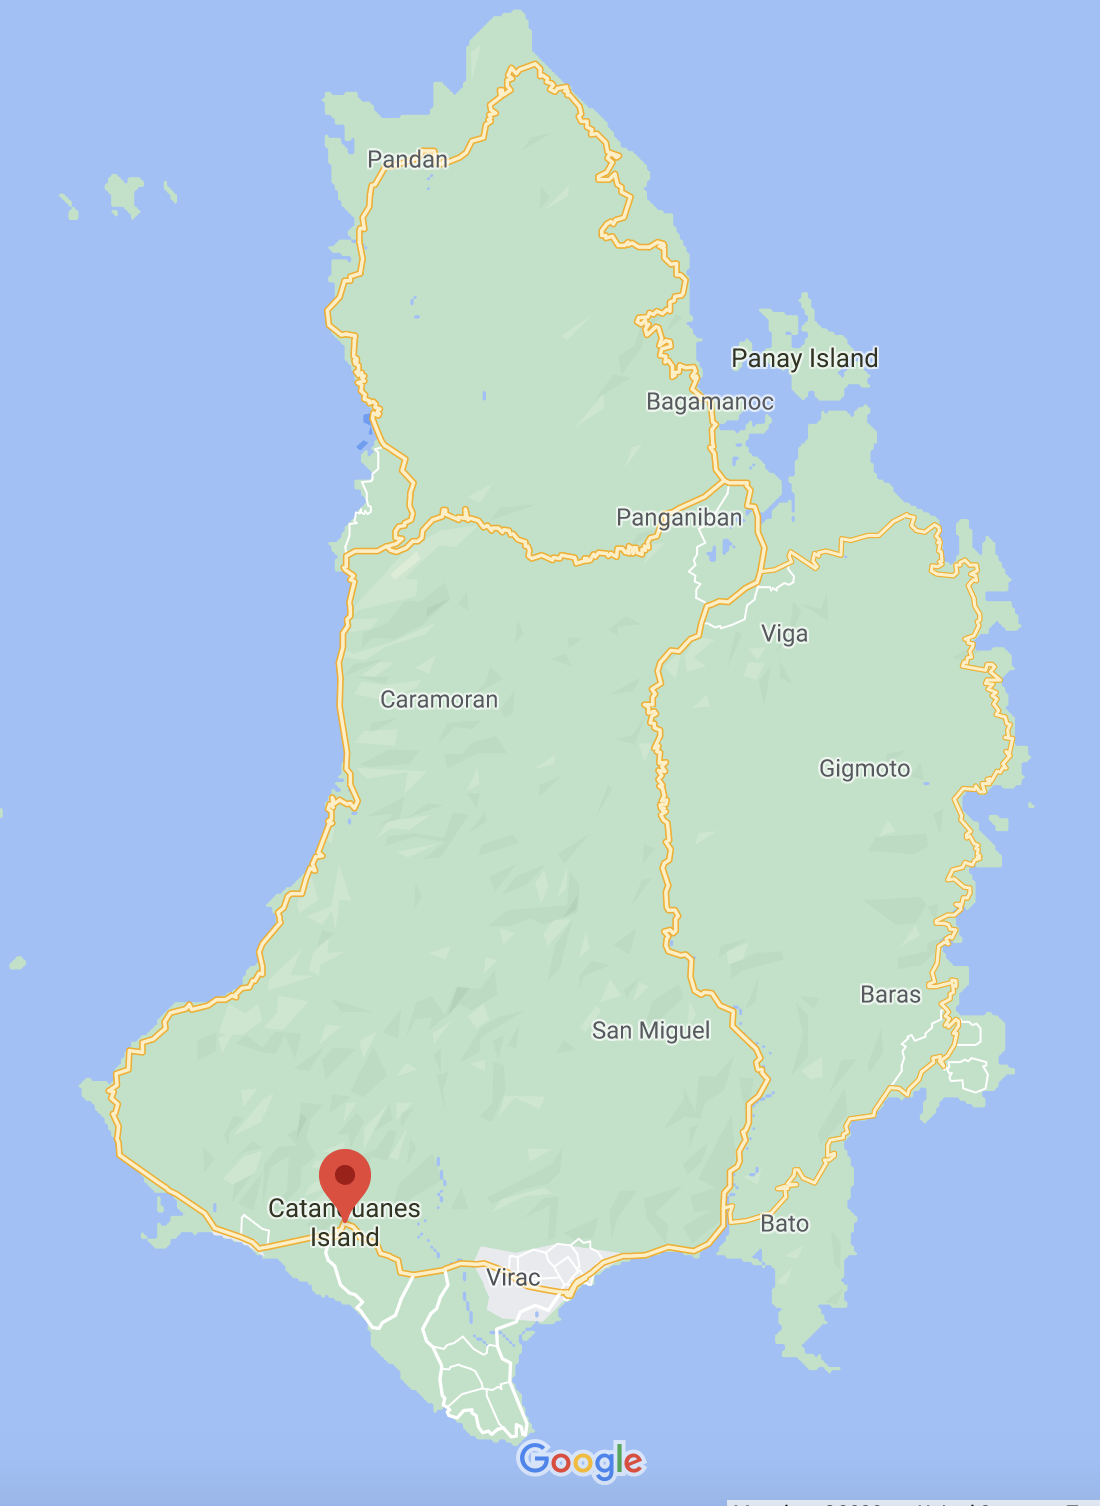

In [32]:
#the actual map
from IPython.display import Image
Image(filename = 'catanduanes.png', width=400)

In [33]:
nodes = pd.read_csv('sample_nodes.csv')
edges = pd.read_csv('sample_edges.csv')

In [34]:
print(nodes.shape)
nodes.head()

(5271, 3)


,id,lon,lat
0,5095155215,124.295006,13.876986
1,1803563830,124.207756,13.574286
2,6874963590,124.168446,14.048521
3,6856269807,124.307676,13.866716
4,7022444145,124.147319,13.932477


In [35]:
print(edges.shape)
edges.head()

(6324, 10)


,id,source,target,length,foot,car_forward,car_backward,bike_forward,bike_backward,wkt
0,74309029,707044882,1803564137,130.320482,1,4,0,2,0,"LINESTRING(124.2362367 13.5850921, 124.2352154..."
1,74309029,1803564137,1803564128,93.282949,1,4,0,2,0,"LINESTRING(124.2352154 13.5844716, 124.2344875..."
2,74309029,1803564128,1803564113,165.436356,1,4,0,2,0,"LINESTRING(124.2344875 13.5840226, 124.2337470..."
3,74309029,1803564113,1803564109,30.515954,1,4,0,2,0,"LINESTRING(124.2331825 13.5832483, 124.2329404..."
4,74309029,1803564109,2456439995,29.936683,1,4,0,2,0,"LINESTRING(124.2329404 13.5831077, 124.2327107..."


## Construct the Graph

In [36]:
#nodes
idnums = list(nodes['id'])
lons = list(nodes['lon'])
lats = list(nodes['lat'])

In [37]:
positions = {}
for i in range(min(len(idnums),len(lons), len(lats))):
    positions.update({idnums[i]:(lons[i],lats[i])})

In [38]:
#construct graph from nodes and their positions
G = nx.Graph()
for n, p in iter(positions.items()):
    G.add_node(n,pos=p)

In [39]:
#add the edges
source_list = list(edges['source'])
target_list = list(edges['target'])
for i in range(len(source_list)):
    G.add_edge(source_list[i],target_list[i])

## Plotting

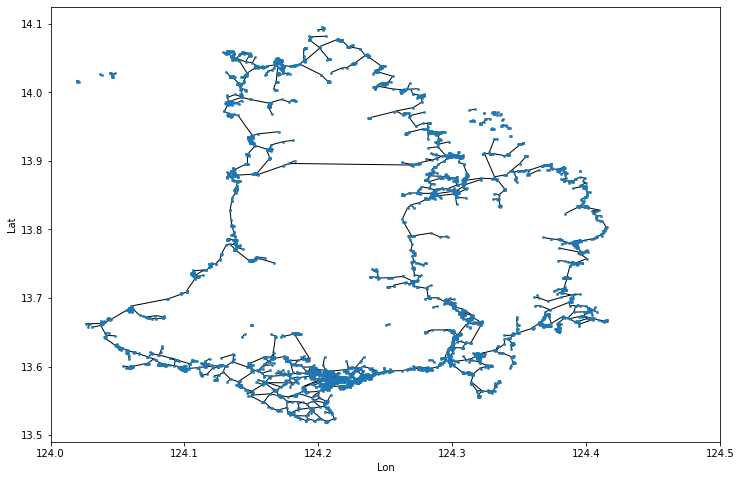

In [40]:
fig, ax = plt.subplots(figsize=(12,8))
nx.draw_networkx(G, positions, ax=ax, node_size=5,linewidths=0.5, with_labels=False)
plt.xlabel('Lon')
plt.ylabel('Lat')
ax.tick_params(left=True, bottom=True, labelleft=True, labelbottom=True)
plt.xlim([124,124.5])
plt.show()

In [41]:
#Plotting function for repeated use
def plot(G, p):
    fig, ax = plt.subplots(figsize=(12,8))
    nx.draw_networkx(G, p, ax=ax, node_size=5,linewidths=0.5, with_labels=False)
    plt.xlabel('Lon')
    plt.ylabel('Lat')
    ax.tick_params(left=True, bottom=True, labelleft=True, labelbottom=True)
    plt.xlim([124,124.5])
    plt.show()

## Largest Connected Subgraph

We are generally only interested in components of the graph that are connected, as our vehicle cannot traverse a road which doesn't exist. The largest connected subgraph will almost always be the relevant component of the export.

In [42]:
#obtain connected subgraphs
def connected_component_subgraphs(G):
    for c in nx.connected_components(G):
        yield G.subgraph(c)

In [43]:
largest_connected_subgraph = max(connected_component_subgraphs(G), key=len)

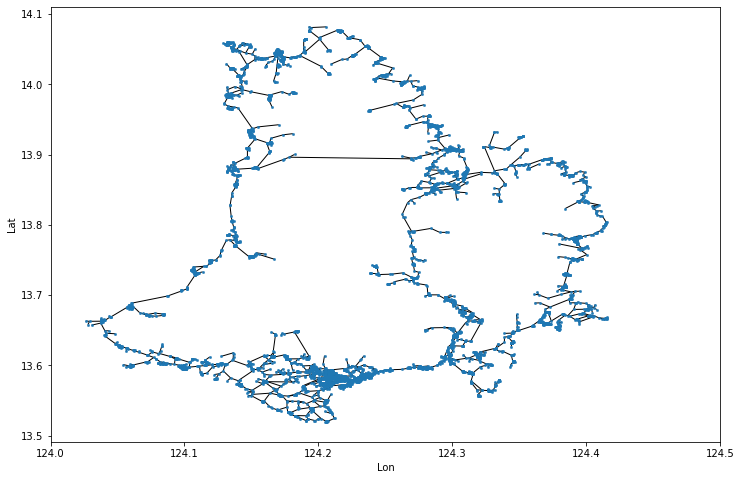

In [44]:
plot(largest_connected_subgraph, positions)